In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image

import os

In [5]:
cv2.imread("F:/HotOrNot/Good/0002.jpg").shape

(350, 468, 3)

In [31]:
train = ImageDataGenerator(1/255)
validation = ImageDataGenerator(1/255)

In [32]:
train_dataset = train.flow_from_directory('F:/HotOrNot/Training/',
                                        target_size= (150,150),
                                         batch_size = 50,
                                         class_mode ='binary')

validation_dataset = train.flow_from_directory('F:/HotOrNot/Validation',
                                        target_size= (150,150),
                                         batch_size = 50,
                                         class_mode ='binary')

Found 710 images belonging to 2 classes.
Found 290 images belonging to 2 classes.


In [33]:
train_dataset.class_indices

{'Average': 0, 'Good': 1}

In [47]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu', input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    #tf.keras.layers.Conv2D(64,(3,3),activation = 'relu', input_shape = (150,150,3)),
                                    #tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                   ])

In [48]:
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
             metrics =['accuracy'])

In [49]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 15,
                    epochs = 25,
                    validation_data = validation_dataset)

Epoch 1/25


C:\Users\Hp\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


15/15 [==============================] - 38s 3s/step - loss: 2042.7055 - acc: 0.5690 - val_loss: 2.5425 - val_acc: 0.6276
Epoch 2/25
15/15 [==============================] - 35s 2s/step - loss: 1.9088 - acc: 0.6042 - val_loss: 0.8326 - val_acc: 0.4966
Epoch 3/25
15/15 [==============================] - 35s 2s/step - loss: 0.4246 - acc: 0.7901 - val_loss: 0.9295 - val_acc: 0.6000
Epoch 4/25
15/15 [==============================] - 36s 2s/step - loss: 7.2598 - acc: 0.7521 - val_loss: 0.9857 - val_acc: 0.6034
Epoch 5/25
15/15 [==============================] - 37s 2s/step - loss: 0.2353 - acc: 0.9183 - val_loss: 0.9897 - val_acc: 0.5862
Epoch 6/25
15/15 [==============================] - 36s 2s/step - loss: 0.1164 - acc: 0.9761 - val_loss: 1.2738 - val_acc: 0.5862
Epoch 7/25
15/15 [==============================] - 35s 2s/step - loss: 0.0443 - acc: 0.9958 - val_loss: 1.5729 - val_acc: 0.5690
Epoch 8/25
15/15 [==============================] - 36s 2s/step - loss: 0.1985 - acc: 0.9704 - val

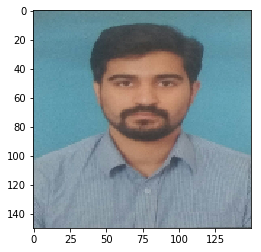

[[0.98239064]]
Good


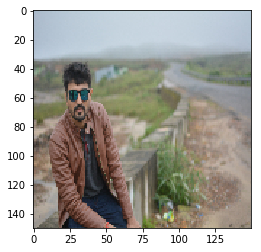

[[0.07536001]]
Average


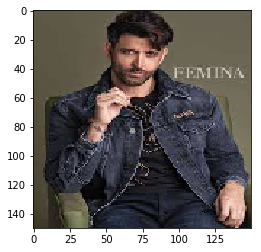

[[0.99758184]]
Good


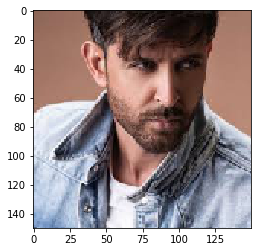

[[0.9999999]]
Good


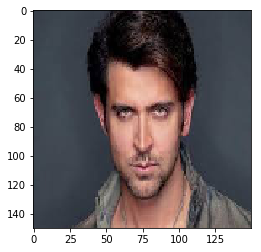

[[0.9999889]]
Good


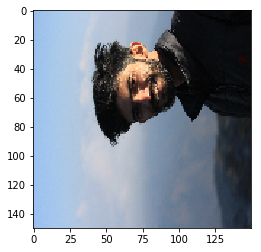

[[0.9999894]]
Good


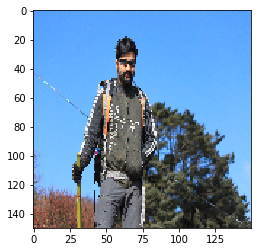

[[0.03987631]]
Average


In [53]:
dir_path = 'F:/HotOrNot/test/'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i,target_size =(150,150))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x= np.expand_dims(x, axis= 0)
    test_images = np.vstack([x])
    
    val=model.predict(test_images)
    print(val)
    if val < 0.55:
        print("Average")
    else:
        print("Good")

In [41]:
print(val)

[[9.128603e-06]]
